# MNIST Classification using CNN
https://keras.io/examples/vision/image_classification_from_scratch/

# Headers

In [1]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers

# Load Data

In [2]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#check image shape
print(x_train[0].shape)

11490434/11490434 [==============================] - 0s 0us/step
(28, 28)


In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

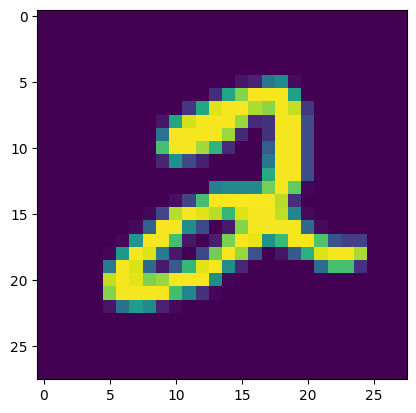

In [4]:
#plot the first image in the dataset
plt.imshow(x_train[5])

In [5]:
print(x_train[1].shape)
print(x_train.shape)
print(x_train.shape[0])

(28, 28)
(60000, 28, 28)
60000


In [6]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
#print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#print(y_train[0])

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


# Visualizing the input data

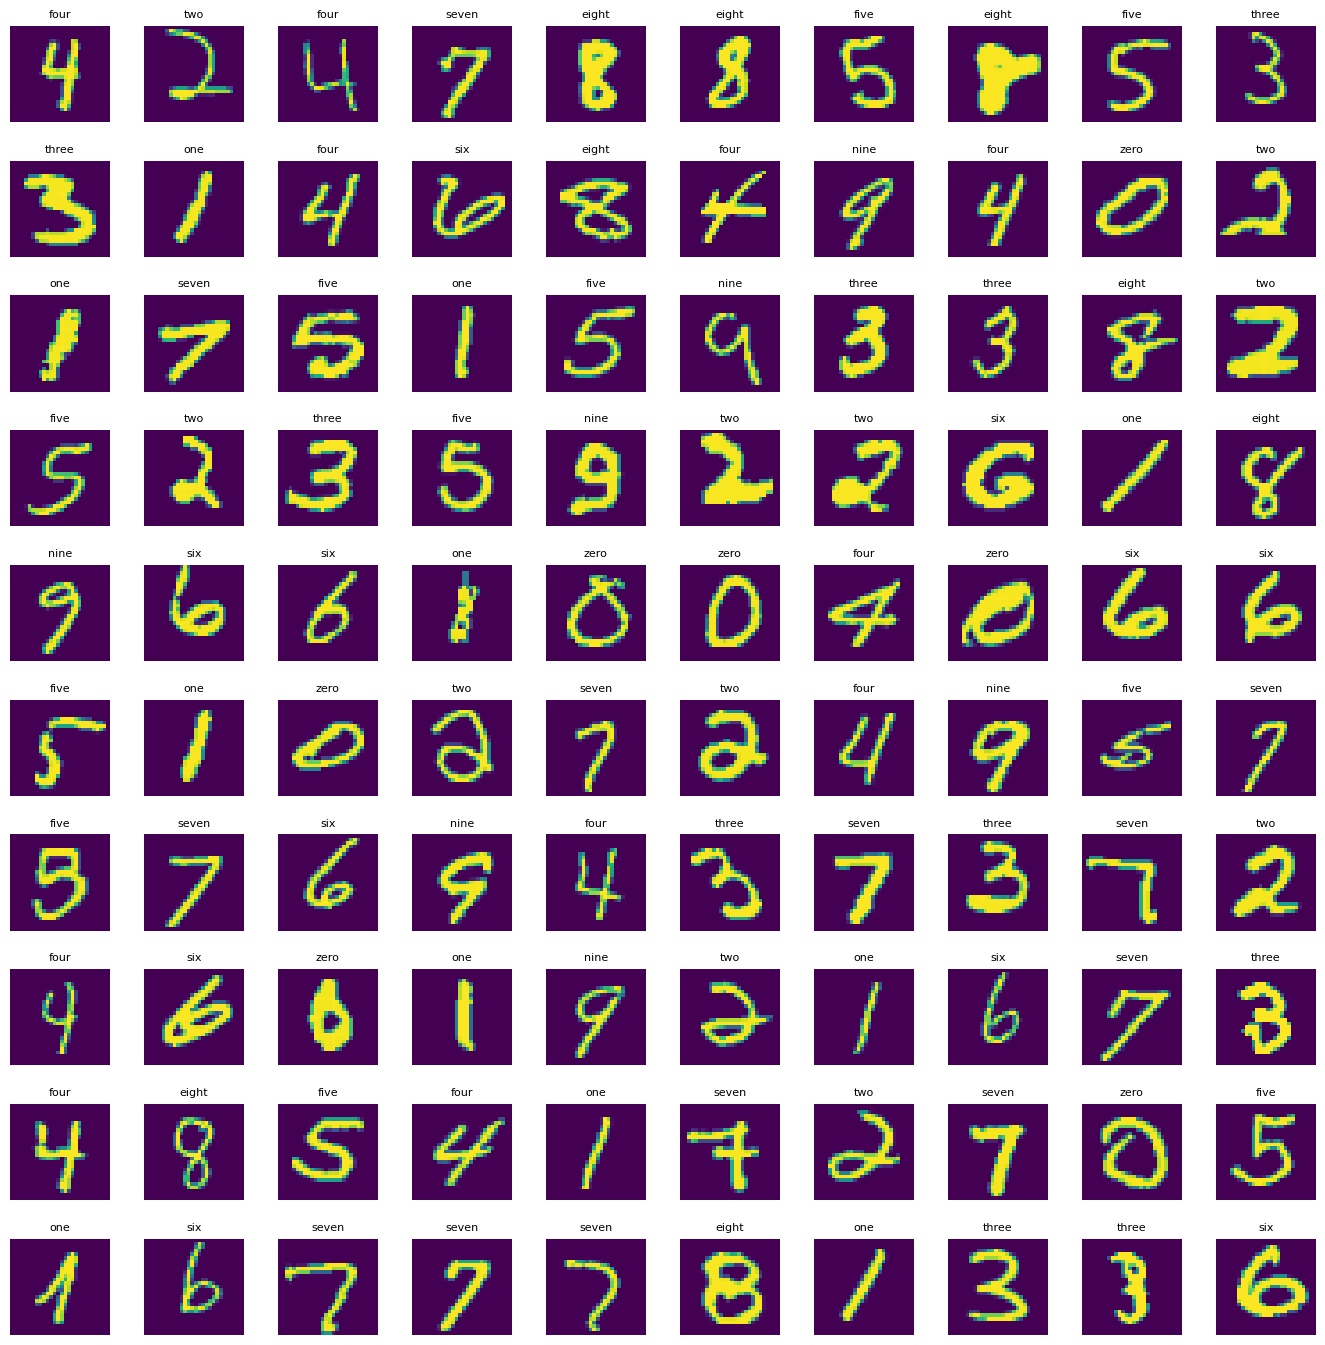

In [7]:
# Define the labels of the dataset
labels = ['one', 'two', 'three', 'four', 'five',
          'six', 'seven', 'eight', 'nine', 'zero']

# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 17 x 17 matrix in an array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(x_train[index,1:])
    #label_index = int(y_train[index])
    label_index = np.argmax(y_train[index])
    axes[i].set_title(labels[label_index-1], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Model Architecture

In [8]:
model = keras.Sequential()

model.add(Conv2D(filters=32, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

# Training and Evaluation

In [10]:
batch_size = 128
epochs = 15

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.0641 - val_accuracy: 0.9903
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0609 - val_accuracy: 0.9907
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 9.0490e-04 - accuracy: 0.9998 - val_loss: 0.0623 - val_accuracy: 0.9895
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 3.1555e-04 - accuracy: 1.0000 - val_loss: 0.0604 - val_accuracy: 0.9910
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 7.9527e-05 - accuracy: 1.0000 - val_loss: 0.0617 - val_accuracy: 0.9905
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 6.0960e-05 - accuracy: 1.0000 - val_loss: 0.0640 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0612 - val_accurac

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.05172884464263916
Test accuracy: 0.9919999837875366


# Evaluate the model

In [15]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(y_test);
print(y_pred);
#print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 2ms/step
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[5.20185876e-25 1.78009650e-23 1.31383424e-14 ... 1.00000000e+00
  5.78560468e-19 1.96414215e-13]
 [1.81853011e-18 2.44812004e-16 1.00000000e+00 ... 3.21971521e-29
  6.59242609e-15 1.12496372e-25]
 [3.14337606e-16 9.99999881e-01 9.18369113e-13 ... 1.75126114e-09
  3.35749140e-09 2.02277736e-15]
 ...
 [1.05832524e-35 5.81204365e-25 3.39914851e-32 ... 5.48022924e-19
  1.92163834e-17 8.85587512e-20]
 [1.25037200e-17 1.61922489e-25 6.03148060e-24 ... 8.95377619e-27
  1.84884868e-11 2.37196376e-26]
 [6.33302422e-18 7.67411146e-24 8.74961476e-16 ... 6.60846524e-30
  6.44698017e-10 1.08346545e-25]]


# Plot Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


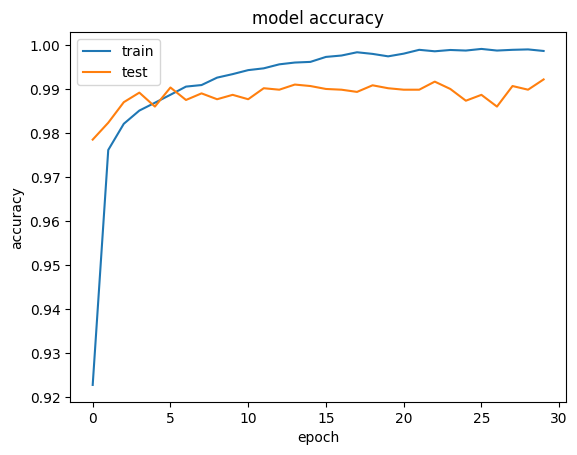

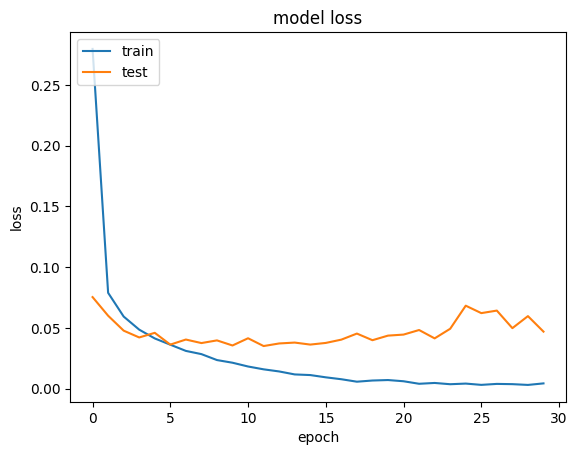

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Visualizing the test data and corresponding predictions

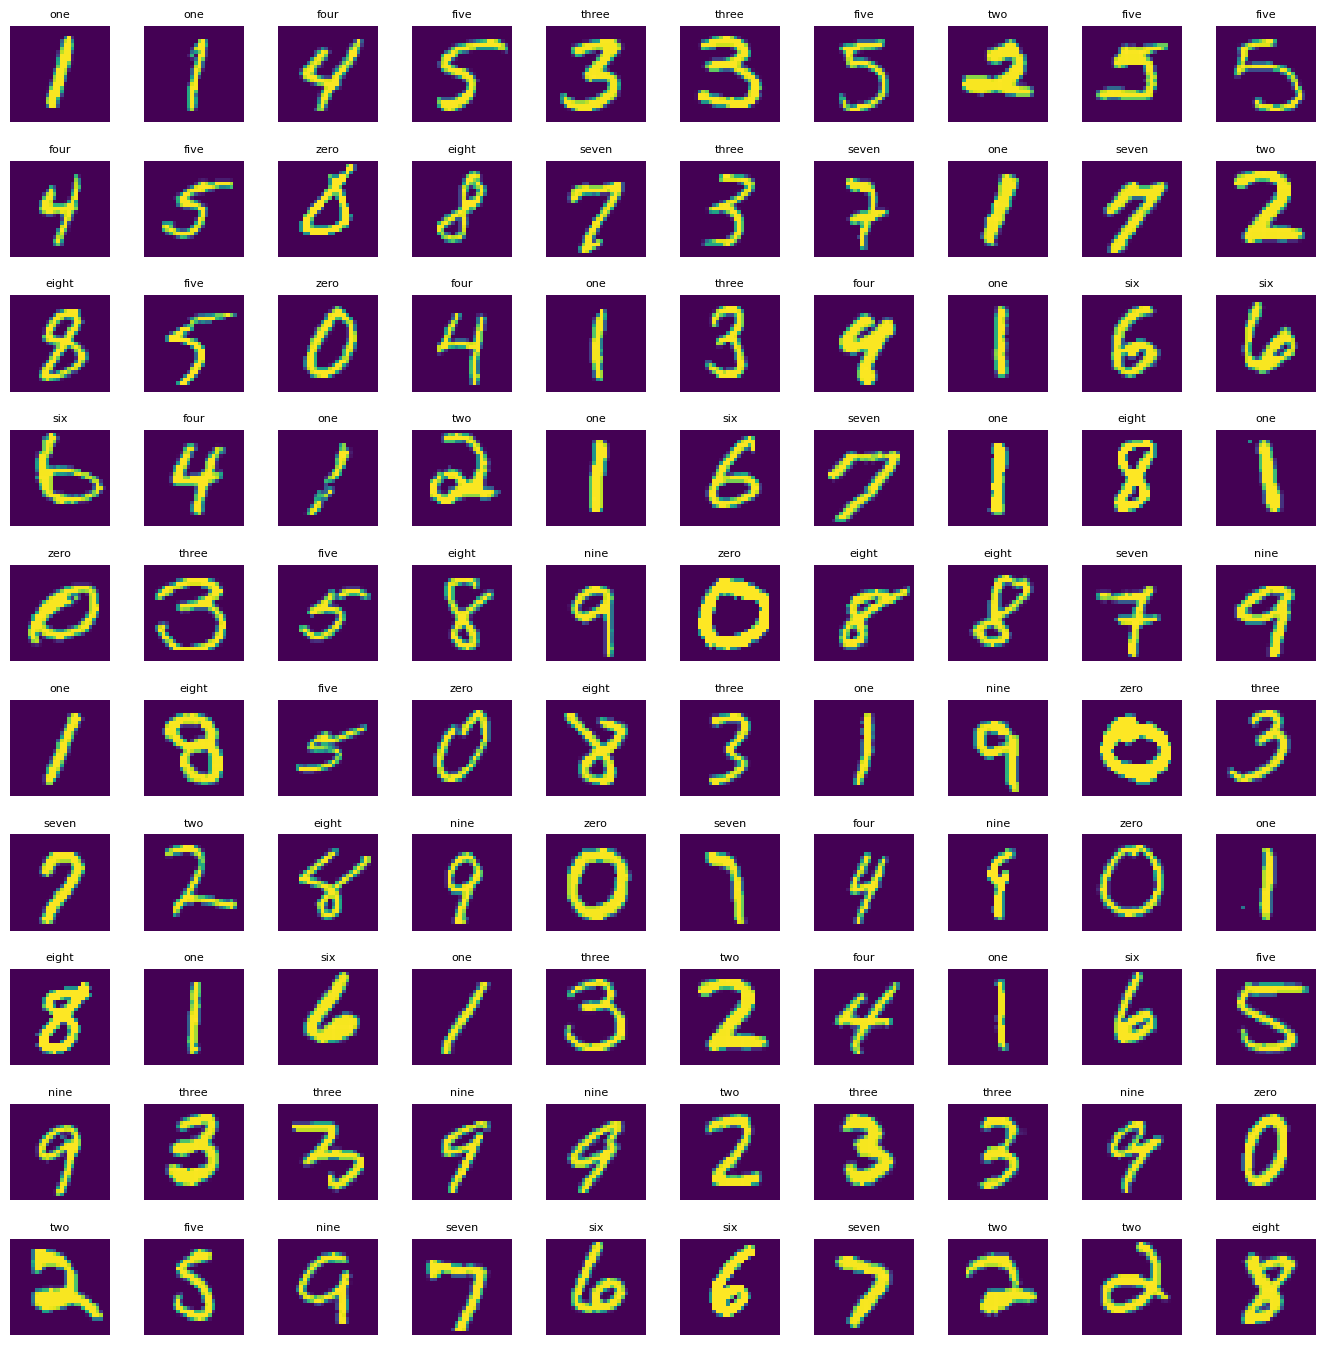

In [ ]:
# Define the labels of the dataset
labels = ['one', 'two', 'three', 'four', 'five',
          'six', 'seven', 'eight', 'nine', 'zero']

# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 17 x 17 matrix in an array

n_test = len(x_test) # get the length of the train dataset

# Select a random number from 0 to n_test
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index
    axes[i].imshow(x_test[index,1:])
    #label_index = int(y_test[index])
    label_index = np.argmax(y_test[index])
    axes[i].set_title(labels[label_index-1], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)